In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
# Step 1: Download the dataset
path = kagglehub.dataset_download("pranavuikey/black-friday-sales-eda")
print("Path to dataset files:", path)

# Step 2: Check what files are inside the downloaded folder
print("Files in the dataset folder:", os.listdir(path))

# Step 3: Load CSV into DataFrame (adjust filename if needed)
train = pd.read_csv(os.path.join(path, "train.csv"))

# Step 4: View the data
train.info()

100%|██████████| 5.48M/5.48M [00:00<00:00, 91.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pranavuikey/black-friday-sales-eda/versions/1
Files in the dataset folder: ['train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null 

In [ ]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
train.drop(['User_ID'], axis=1,inplace = True)

In [ ]:
train.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
train['Gender']=train['Gender'].map({'F':0,'M':1})

In [ ]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
train['Age']=train['Age'].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [ ]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train_city = pd.get_dummies(train['City_Category'],drop_first=True)

In [ ]:
train_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
550063,True,False
550064,False,True
550065,True,False
550066,False,True


In [ ]:
train=pd.concat([train,train_city],axis=1)

In [ ]:
train.drop(['City_Category'],axis=1,inplace=True)

In [ ]:
train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,2,16,4+,0,8,NaN,NaN,7969,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,NaN,NaN,368,True,False
550064,P00375436,0,3,1,3,0,20,NaN,NaN,371,False,True
550065,P00375436,0,3,15,4+,1,20,NaN,NaN,137,True,False
550066,P00375436,0,2,1,2,0,20,NaN,NaN,365,False,True


In [ ]:
train.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638
Product_Category_3,383247
Purchase,0


In [ ]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Replac The missing valuse with Mode

In [ ]:
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0])

In [ ]:
   train['Product_Category_1']=train['Product_Category_1'].fillna(train['Product_Category_1'].mode()[0])

In [ ]:
   train['Product_Category_3']=train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  bool   
 11  C                           550068 non-null  bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 43.0+ MB


In [ ]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
train['Stay_In_Current_City_Years'].astype(int)

,Stay_In_Current_City_Years
0,2
1,2
2,2
3,2
4,4
...,...
550063,1
550064,3
550065,4
550066,2


In [ ]:
train = train.astype({col:'int' for col in train.select_dtypes(include='uint8').columns})

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  bool   
 11  C                           550068 non-null  bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 43.0+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

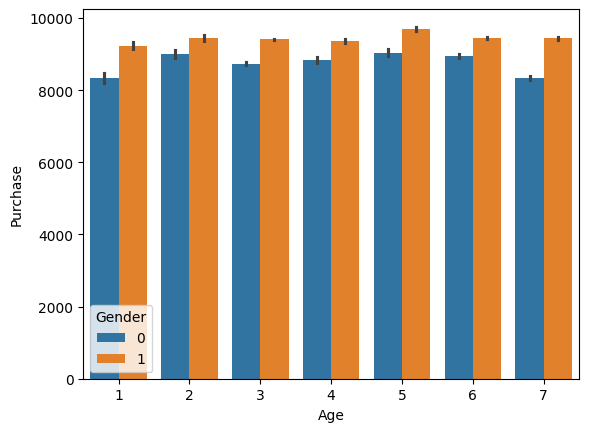

In [ ]:
sns.barplot(x='Age', y='Purchase',hue='Gender', data=train)

<Axes: xlabel='Occupation', ylabel='Purchase'>

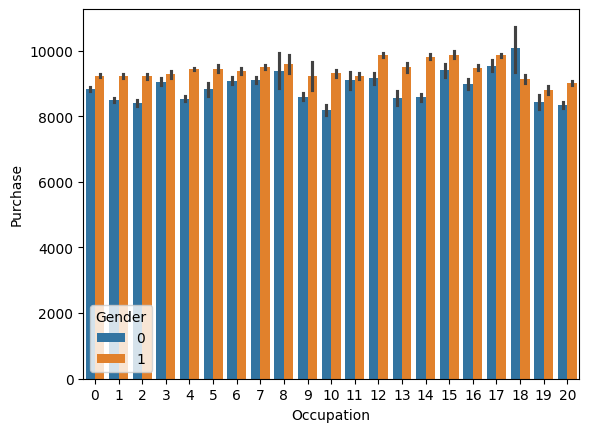

In [ ]:


sns.barplot(x='Occupation', y='Purchase',hue='Gender', data=train)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

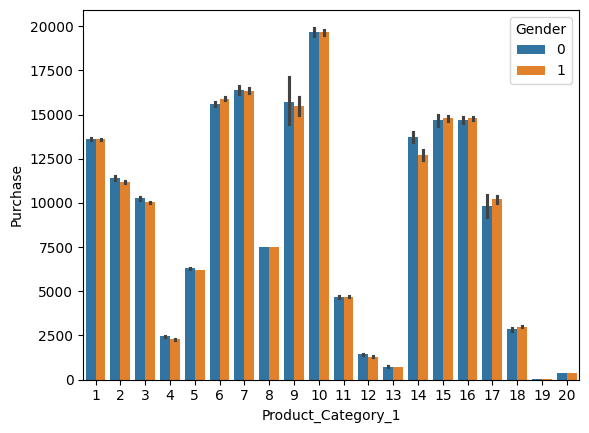

In [ ]:


sns.barplot(x='Product_Category_1', y='Purchase',hue='Gender', data=train)


In [ ]:
train = train.apply(lambda col: col.astype(int) if not pd.api.types.is_integer_dtype(col) else col)


ValueError: invalid literal for int() with base 10: 'P00069042'

In [ ]:
X = train.drop(['Purchase','Product_ID'], axis=1)
Y = train['Purchase']

In [ ]:
X = X.astype({col: 'int' for col in X.columns
             if not pd.api.types.is_integer_dtype(train[col])})

In [ ]:
X.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int64
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Product_Category_2          550068 non-null  int64
 7   Product_Category_3          550068 non-null  int64
 8   B                           550068 non-null  int64
 9   C                           550068 non-null  int64
dtypes: int64(10)
memory usage: 42.0 MB


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Purchase
Non-Null Count   Dtype
--------------   -----
550068 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1141)

In [ ]:
y_test.shape

(181523,)

In [ ]:

Sc= StandardScaler()

In [ ]:
 X_train = Sc.fit_transform(X_train)
 X_test = Sc.transform(X_test)


In [ ]:
X_train.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
sample= pd.DataFrame(X_train)

In [ ]:
sample.describe(


)

,0,1,2,3,4,5,6,7,8,9
count,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05
mean,8.953480e-17,-2.328213e-16,5.344326e-17,-3.485765e-17,5.575682e-17,5.884156e-17,2.479366e-17,7.727293e-17,-1.619493e-17,2.355976e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.744449e+00,-1.963550e+00,-1.238244e+00,-1.441343e+00,-8.335996e-01,-1.118359e+00,-1.691117e+00,-4.371758e+00,-8.526897e-01,-6.710031e-01
25%,5.732469e-01,-8.268690e-01,-9.318717e-01,-6.660682e-01,-8.335996e-01,-1.118359e+00,-2.932986e-01,3.685384e-01,-8.526897e-01,-6.710031e-01
50%,5.732469e-01,-2.585286e-01,-1.659402e-01,1.092068e-01,-8.335996e-01,-1.039592e-01,-2.932986e-01,3.685384e-01,-8.526897e-01,-6.710031e-01
75%,5.732469e-01,8.781522e-01,9.063640e-01,8.844818e-01,1.199617e+00,6.568409e-01,1.104519e+00,3.685384e-01,1.172760e+00,1.490306e+00
max,5.732469e-01,1.446493e+00,1.825482e+00,1.659757e+00,1.199617e+00,3.700041e+00,2.036398e+00,1.097815e+00,1.172760e+00,1.490306e+00
